In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [212]:
df = pd.read_csv("data/train.CSV", encoding="cp949")
df2 = pd.read_csv("data/test.CSV", encoding="cp949")

col = df.iloc[0,:]
col2 = df2.iloc[0,:]

df.columns = col
df2.columns=col2
df = df.iloc[1:,:].fillna(0)
df2 = df.iloc[1:,:].fillna(0)

df_= df.iloc[:,4:]
df2_= df2.iloc[:,4:]

df_.replace('없음.', np.nan, inplace=True)
df2_.replace('없음.', np.nan, inplace=True)
df2_= df2_.astype(np.float64)

df_= df_.astype(np.float64)
df_.head()
# 불필요한 변수 삭제 환다 인덱스, 이름 등..

,나이,exclusion\n해야할 것:1\n,recurrence 여부\n있으면:1\n없으면:0,menopausal state\npremenopausal:1\npost:0,Location_1\nRt :1\nLt :2\nBoth:3,Location_2\nUOQ:1\nLOQ:2\nUIQ:3\nLIQ:4\nSub:5,수술법_1\nBCS:1\nMastectomy :2,수술법_2\nALND:1\nSLNB:2\nOmit:3,Pathology_result\n,T_stage\nT1:1\nT2:2\nT3:3,...,Peritumoral_maximal_ADC,Peritumoral_tumoral_ADC_ratio,contralateral_mean_ADC,Adjacent_vessel,Increased_ipsilateral_whole_breast_vascularity,Multiplicity,Nipple,Chest_wall,LN,Skin
1,59.0,0.0,1.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,...,1695.0,2.253989,1325.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
2,48.0,0.0,0.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,...,1524.0,1.133086,1426.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,80.0,0.0,0.0,0.0,2.0,3.0,1.0,2.0,2.0,1.0,...,1134.0,1.662757,1024.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
4,70.0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,1.0,2.0,...,2178.0,1.785246,1877.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
5,46.0,0.0,0.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,...,1652.0,1.912037,1275.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0


In [207]:
set(df.columns)
m= set(df2.columns) - set(df.columns)

[k for k in m]

['T_stage',
 'MR_size \n(mm)',
 nan,
 'NME\nfocal:1\nlinear:2\nsegmental:3\nregional:4',
 nan,
 'security \nnumber']

In [217]:
y = df_.iloc[:,[2]].values
test_y = df2_.iloc[:,[2]].values

X= df_.drop([df_.columns[2]],axis=1).fillna(0)
test_X= df2_.drop([df2_.columns[2]],axis=1).fillna(0)

In [221]:
X.shape, test_X.shape,y.shape,test_y.shape

((350, 40), (349, 40), (350, 1), (349, 1))

In [218]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()

scale_X = minmax.fit_transform(X)
scale_test_X = minmax.fit_transform(test_X)

In [222]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from tensorflow.keras import backend as K
from keras.optimizers import RMSprop, Adam



model = Sequential()
K.clear_session()
# 입력층 및 은닉층 추가 (입력 20차원, 은닉층 16개 노드)
model.add(Dense(40, input_dim=40, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
optimizer = Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# 모델 요약 출력
model.summary()

# 5. 모델 학습
history = model.fit(scale_X, y, epochs=500, batch_size=16, validation_data=[scale_test_X,test_y])

# 6. 모델 평가
#loss, accuracy = model.evaluate(X_test, y_test)
#print(f"Test Accuracy: {accuracy:.4f}")


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 40)                1640      
                                                                 
 dense_1 (Dense)             (None, 1)                 41        
                                                                 
Total params: 1,681
Trainable params: 1,681
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
22/22 [==============================] - 0s 4ms/step - loss: 0.7383 - accuracy: 0.3514 - val_loss: 0.7138 - val_accuracy: 0.4413
Epoch 2/500
22/22 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.5171 - val_loss: 0.6724 - val_accuracy: 0.6390
Epoch 3/500
22/22 [==============================] - 0s 2ms/step - loss: 0.6549 - accuracy: 0.7057 - val_loss: 0.6359 - val_accuracy: 0.7708
Epoch 4/500
22/22 [========

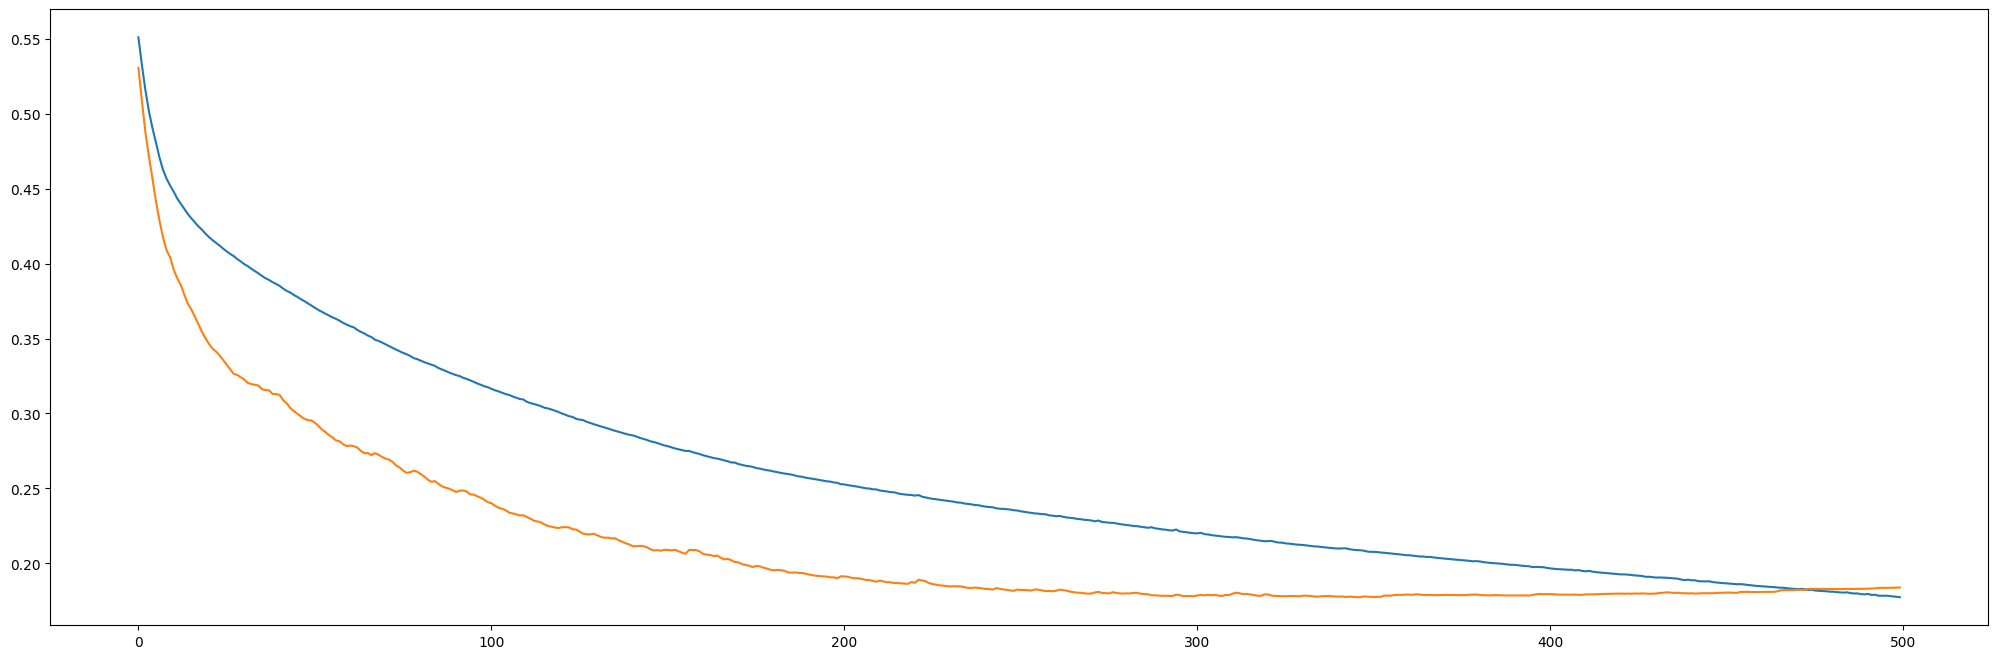

In [181]:
plt.figure(figsize=(25,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [184]:
pred = model.predict(scale_X)

11/11 [==============================] - 0s 358us/step


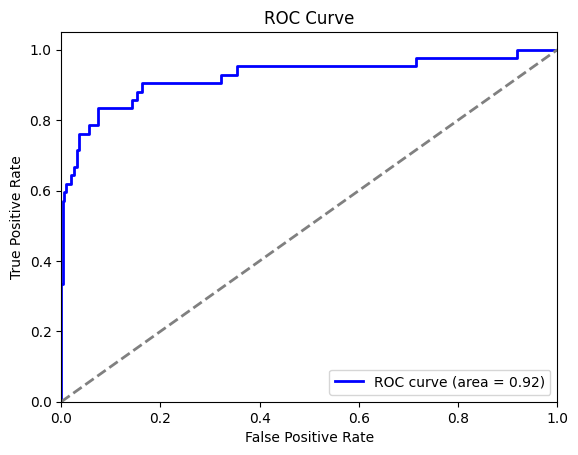

In [188]:
from sklearn.metrics import roc_curve, auc


fpr, tpr, thresholds = roc_curve(y, pred)

# AUC 계산
roc_auc = auc(fpr, tpr)

# ROC 커브 그리기
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [113]:
#df_.replace('없음.', np.nan, inplace=True)
#df_.T[strlogicindex].T.astype(np.float64) 
df_.astype(np.float64)

ValueError: could not convert string to float: '없음.'

In [102]:
df_.astype(np.int)

AttributeError: module 'numpy' has no attribute 'int'.
`np.int` was a deprecated alias for the builtin `int`. To avoid this error in existing code, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [62]:
[df_.iloc[:,i].astype(int) for i in range(df_.iloc[:].shape[1])]

ValueError: invalid literal for int() with base 10: '2.253989362'